In [97]:
import pandas as pd
import numpy as np
import spacy 
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [90]:
!python3 -m spacy download en_core_web_sm


     ---------------------------------------- 12.8/12.8 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
NER = spacy.load("en_core_web_sm")

In [4]:
import os

all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry "Book 1 - The Philosopher's Stone.txt.txt">,
 <DirEntry 'Book 2 - The Chamber of Secrets.txt.txt'>,
 <DirEntry 'Book 3 - The Prisoner of Azkaban.txt.txt'>,
 <DirEntry 'Book 4 - The Goblet of Fire.txt.txt'>,
 <DirEntry 'Book 5 - The Order of the Phoenix.txt.txt'>,
 <DirEntry 'Book 6 - The Half Blood Prince.txt.txt'>,
 <DirEntry 'Book 7 - The Deathly Hallows.txt.txt'>]

In [6]:
book = all_books[1]
book_text = open(book, encoding="utf8").read()
book_doc = NER(book_text)

In [7]:
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

In [8]:
character_df = pd.read_csv("charactersv1.csv")

In [9]:
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]","",x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ',1)[0])

In [10]:
pd.set_option('display.max_rows', None)
character_df

book                    character character_firstname
0    the Philosopher's Stone                 Harry Potter               Harry
1    the Philosopher's Stone                  Ron Weasley                 Ron
2    the Philosopher's Stone             Hermione Granger            Hermione
3    the Philosopher's Stone             Albus Dumbledore               Albus
4    the Philosopher's Stone                Rubeus Hagrid              Rubeus
5    the Philosopher's Stone                Severus Snape             Severus
6    the Philosopher's Stone                 Draco Malfoy               Draco
7    the Philosopher's Stone           Professor Quirrell           Professor
8    the Philosopher's Stone         Professor McGonagall           Professor
9    the Philosopher's Stone         Professor Dumbledore           Professor
10   the Philosopher's Stone               Lord Voldemort                Lord
11   the Philosopher's Stone               Vernon Dursley              Vernon
12   the Philosopher's Stone              Petunia Dursley             Petunia
13   the Philosopher's Stone               Dudley Dursley              Dudley
14   the Philosopher's Stone                       Hagrid              Hagrid
15   the Philosopher's Stone           Professor Quirrell           Professor
16   the Philosopher's Stone             Professor Sprout           Professor
17   the Philosopher's Stone           Professor Flitwick           Professor
18   the Philosopher's Stone              Professor Snape           Professor
19   the Philosopher's Stone         Professor Dumbledore           Professor
20   the Philosopher's Stone            Gringotts Goblins           Gringotts
21   the Philosopher's Stone                        Filch               Filch
22   the Philosopher's Stone                  Mrs. Norris                Mrs.
23   the Philosopher's Stone           Neville Longbottom             Neville
24   the Philosopher's Stone                  Dean Thomas                Dean
25   the Philosopher's Stone              Seamus Finnigan              Seamus
26   the Philosopher's Stone               Lavender Brown            Lavender
27   the Philosopher's Stone                Parvati Patil             Parvati
28   the Philosopher's Stone                Colin Creevey               Colin
29   the Philosopher's Stone               Dennis Creevey              Dennis
30   the Philosopher's Stone         Nearly Headless Nick              Nearly
31   the Philosopher's Stone                       Peeves              Peeves
32   the Philosopher's Stone                 The Fat Lady                 The
33   the Philosopher's Stone                The Grey Lady                 The
34   the Philosopher's Stone               Moaning Myrtle             Moaning
35   the Philosopher's Stone                  Madam Pince               Madam
36   the Philosopher's Stone                Madam Pomfrey               Madam
37   the Philosopher's Stone                Tom Riddle Sr                 Tom
38   the Philosopher's Stone                Tom Riddle Jr                 Tom
39   the Philosopher's Stone              Harry's parents             Harry's
40   the Philosopher's Stone        Lily and James Potter                Lily
41   the Philosopher's Stone               Mr. Ollivander                 Mr.
42   the Philosopher's Stone                       Hagrid              Hagrid
43   the Philosopher's Stone         Harry's Uncle Vernon             Harry's
44   the Philosopher's Stone                 Aunt Petunia                Aunt
45   the Philosopher's Stone                Cousin Dudley              Cousin
46   the Philosopher's Stone           Mr and Mrs Weasley                  Mr
47   the Philosopher's Stone                        Percy               Percy
48   the Philosopher's Stone                         Fred                Fred
49   the Philosopher's Stone                       George              George
50   the Philosopher's Stone                  

In [11]:
sent_entity_df = []

for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent,"entities": entity_list})
sent_entity_df = pd.DataFrame(sent_entity_df)

In [12]:
sent_entity_df

sentence  \
0                                            (\n, J, .)   
1                                                (K, .)   
2                                       (R, O, W, L, !)   
3     (N, G, \n\n, HARRY, \n\n, POTTER, \n\n\n\n\n, ...   
4     (Mr., \n, Vernon, Dursley, had, been, woken, i...   
5              (\n\n, “, Third, time, this, week, !, ”)   
6                   (he, roared, across, the, table, .)   
7     (“, If, \n, you, ca, n’t, control, that, owl, ...   
8     (\n\n, Harry, tried, ,, yet, again, ,, to, exp...   
9          (\n\n, “, She, ’s, bored, ,, ”, he, said, .)   
10    (“, She, ’s, used, to, flying, around, \n, out...   
11    (If, I, could, just, let, her, out, at, night,...   
12    (“, I, know, \n, what, 11, happen, if, that, o...   
13    (\n\n, He, exchanged, dark, looks, with, his, ...   
14    (Harry, tried, to, argue, back, but, his, word...   
15    (Page, |, 2, Harry, Potter, and, the, Chamber,...   
16                      (“, I, want, more, bacon, ., ”)   
17    (\n\n\n\n, “, There, ’s, more, in, the, frying...   
18    (“, We, \n, must, build, you, up, while, we, ’...   
19                                                (...)   
20    (I, \n, do, n’t, like, the, sound, of, that, s...   
21    (..., ”, \n\n, “, Nonsense, ,, Petunia, ,, I, ...   
22    (“, Dudley, \n, gets, enough, ,, do, n’t, you,...   
23                                               (\n\n)   
24                    (“, Pass, the, frying, pan, ., ”)   
25    (\n\n, “, You, ’ve, forgotten, the, magic, wor...   
26                                               (\n\n)   
27    (The, effect, of, this, simple, sentence, on, ...   
28    (\n\n, “, I, meant, ‘, please, ’, !, ”, said, ...   
29    (“, I, did, n’t, mean, \n\n\n\n, “, WHAT, HAVE...   
30    (roared, \n, Uncle, Vernon, ,, pounding, the, ...   
31                                           (\n\n\n\n)   
32    (Page, |, 3, Harry, Potter, and, the, Chamber,...   
33    (“, I, just, —, ”, \n\n\n\n, “, I, WARNED, YOU...   
34    (I, WILL, NOT, TOLERATE, MENTION, \n, OF, YOUR...   
35    (\n\n, Harry, stared, from, his, purple, -, fa...   
36                                               (\n\n)   
37    (“, All, right, ,, ”, said, Harry, ,, “, all, ...   
38                                               (\n\n)   
39    (Ever, since, Harry, had, come, home, for, the...   
40    (As, a, matter, of, fact, ,, he, \n, was, as, ...   
41    (Harry, Potter, was, a, wizard, —, a, wizard, ...   
42    (And, if, the, Dursleys, were, unhappy, to, ha...   
43    (He, missed, Hogwarts, so, much, it, was, like...   
44    (He, missed, the, castle, ,, with, its, \n, se...   
45                                           (\n\n\n\n)   
46    (Page, |, 4, Harry, Potter, and, the, Chamber,...   
47    (What, did, \n, the, Dursleys, care, if, Harry...   
48    (What, was, it, to, the, Dursleys, if, Harry, ...   
49    (The, Dursleys, were, what, wizards, called, M...   
50    (Uncle, Vernon, had, \n, even, padlocked, Harr...   
51    (Harry, looked, nothing, like, the, rest, of, ...   
52    (Uncle, \n, Vernon, was, large, and, neckless,...   
53    (Harry, ,, on, \n, the, other, hand, ,, was, s...   
54    (He, wore, round, glasses, ,, and, on, his, fo...   
55                                               (\n\n)   
56    (It, was, this, scar, that, made, Harry, so, p...   
57    (This, scar, was, the, only, \n, hint, of, Har...   
58                                               (\n\n)   
59    (At, the, age, of, one, year, old, ,, Harry, h...   
60    (Harry, ’s, parents, had, died, \n, in, Voldem...   
61    (Page, |, 5, Harry, Potter, and, the, Chamber,...   
62    (So, Harry, had, been, brought, up, by, his, d...   
63    (He, had, spent, ten, years, with, \n, the, Du...   
64                                               (\n\n)   
65    (And, then, ,, exactly, a, year, ago, ,, Hogwa...   
66    (Harry, had, \n, taken, up, his, place, at, wi...   
67    (but, now, the, school, year,

In [13]:
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [14]:
filter_entity(["Harry","Thu","2"], character_df)

['Harry']

In [15]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
sent_entity_df_filtered.head(10)

sentence  \
4   (Mr., \n, Vernon, Dursley, had, been, woken, i...   
13  (\n\n, He, exchanged, dark, looks, with, his, ...   
14  (Harry, tried, to, argue, back, but, his, word...   
15  (Page, |, 2, Harry, Potter, and, the, Chamber,...   
21  (..., ”, \n\n, “, Nonsense, ,, Petunia, ,, I, ...   
22  (“, Dudley, \n, gets, enough, ,, do, n’t, you,...   
25  (\n\n, “, You, ’ve, forgotten, the, magic, wor...   
27  (The, effect, of, this, simple, sentence, on, ...   
28  (\n\n, “, I, meant, ‘, please, ’, !, ”, said, ...   
32  (Page, |, 3, Harry, Potter, and, the, Chamber,...   

                                             entities       character_entities  
4            [Vernon Dursley, the early hours, Harry]  [Vernon Dursley, Harry]  
13                                          [Petunia]                [Petunia]  
14                          [Harry, Dursleys, Dudley]          [Harry, Dudley]  
15  [Harry Potter, the Chamber of Secrets - J.K. R...           [Harry Potter]  
21       [Nonsense, Petunia, Smeltings, Uncle Vernon]                [Petunia]  
22                            [Dudley, Dudley, Harry]  [Dudley, Dudley, Harry]  
25                                            [Harry]                  [Harry]  
27                         [Dudley, Dursley, Dursley]                 [Dudley]  
28                                            [Harry]                  [Harry]  
32  [3, Harry Potter, the Chamber of Secrets - J.K...           [Harry Potter]

In [16]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

    char_unique = [char_list[i] for i in range(len(char_list))
                    if (i==0) or char_list[i] != char_list[i-1]]

    if len(char_unique) > 1:
        for idx, a in enumerate (char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [17]:
relationships_df = pd.DataFrame(relationships)

In [18]:
pd.set_option('display.max_rows', None)
relationships_df

source                  target
0              Vernon Dursley                   Harry
1              Vernon Dursley                   Harry
2              Vernon Dursley                   Harry
3              Vernon Dursley                   Harry
4              Vernon Dursley                   Harry
5                     Petunia                   Harry
6                       Harry                  Dudley
7                     Petunia                   Harry
8                       Harry                  Dudley
9                      Dudley            Harry Potter
10                    Petunia                   Harry
11                      Harry                  Dudley
12                     Dudley            Harry Potter
13                    Petunia                   Harry
14                      Harry                  Dudley
15                     Dudley            Harry Potter
16                    Petunia                   Harry
17                      Harry                  Dudley
18                     Dudley            Harry Potter
19                      Harry                  Dudley
20                     Dudley            Harry Potter
21                    Petunia                  Dudley
22                     Dudley                   Harry
23                    Petunia                  Dudley
24                     Dudley                   Harry
25                    Petunia                  Dudley
26                     Dudley                   Harry
27                    Petunia                  Dudley
28                     Dudley                   Harry
29                    Petunia                  Dudley
30                     Dudley                   Harry
31                     Dudley                   Harry
32                      Harry                  Dudley
33                      Harry                  Dudley
34                     Dudley                   Harry
35                      Harry                  Dudley
36                     Dudley                   Harry
37                      Harry                  Dudley
38                     Dudley                   Harry
39                     Dudley                   Harry
40                     Dudley                   Harry
41                      Harry            Harry Potter
42                      Harry            Harry Potter
43               Harry Potter                   Harry
44                      Harry                  Dudley
45               Harry Potter                   Harry
46                      Harry                  Dudley
47               Harry Potter                   Harry
48                      Harry                  Dudley
49                     Dudley                   Harry
50                      Harry                  Dudley
51                     Dudley                   Harry
52                      Harry                  Dudley
53                     Dudley                   Harry
54                      Harry                  Dudley
55                     Dudley                   Harry
56                      Harry            Harry Potter
57                      Harry            Harry Potter
58               Harry Potter                   Harry
59                      Harry            Harry Potter
60               Harry Potter                   Harry
61                      Harry            Harry Potter
62               Harry Potter                   Harry
63                      Harry                  Hagrid
64               Harry Potter                   Harry
65                      Harry                  Hagrid
66               Harry Potter                   Harry
67                      Harry                  Hagrid
68                     Hagrid            Harry Potter
69               Harry Potter                   Harry
70                      Harry                  Hagrid
71                     Hagrid            Harry Potter
72               Harry Potter                   Harry
73                     Hagr

In [19]:
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis=1), columns=relationships_df.columns)
relationships_df

source                  target
0                       Harry          Vernon Dursley
1                       Harry          Vernon Dursley
2                       Harry          Vernon Dursley
3                       Harry          Vernon Dursley
4                       Harry          Vernon Dursley
5                       Harry                 Petunia
6                      Dudley                   Harry
7                       Harry                 Petunia
8                      Dudley                   Harry
9                      Dudley            Harry Potter
10                      Harry                 Petunia
11                     Dudley                   Harry
12                     Dudley            Harry Potter
13                      Harry                 Petunia
14                     Dudley                   Harry
15                     Dudley            Harry Potter
16                      Harry                 Petunia
17                     Dudley                   Harry
18                     Dudley            Harry Potter
19                     Dudley                   Harry
20                     Dudley            Harry Potter
21                     Dudley                 Petunia
22                     Dudley                   Harry
23                     Dudley                 Petunia
24                     Dudley                   Harry
25                     Dudley                 Petunia
26                     Dudley                   Harry
27                     Dudley                 Petunia
28                     Dudley                   Harry
29                     Dudley                 Petunia
30                     Dudley                   Harry
31                     Dudley                   Harry
32                     Dudley                   Harry
33                     Dudley                   Harry
34                     Dudley                   Harry
35                     Dudley                   Harry
36                     Dudley                   Harry
37                     Dudley                   Harry
38                     Dudley                   Harry
39                     Dudley                   Harry
40                     Dudley                   Harry
41                      Harry            Harry Potter
42                      Harry            Harry Potter
43                      Harry            Harry Potter
44                     Dudley                   Harry
45                      Harry            Harry Potter
46                     Dudley                   Harry
47                      Harry            Harry Potter
48                     Dudley                   Harry
49                     Dudley                   Harry
50                     Dudley                   Harry
51                     Dudley                   Harry
52                     Dudley                   Harry
53                     Dudley                   Harry
54                     Dudley                   Harry
55                     Dudley                   Harry
56                      Harry            Harry Potter
57                      Harry            Harry Potter
58                      Harry            Harry Potter
59                      Harry            Harry Potter
60                      Harry            Harry Potter
61                      Harry            Harry Potter
62                      Harry            Harry Potter
63                     Hagrid                   Harry
64                      Harry            Harry Potter
65                     Hagrid                   Harry
66                      Harry            Harry Potter
67                     Hagrid                   Harry
68                     Hagrid            Harry Potter
69                      Harry            Harry Potter
70                     Hagrid                   Harry
71                     Hagrid            Harry Potter
72                      Harry            Harry Potter
73                     Hagr

In [20]:
relationships_df["value"] = 1
relationships_df = relationships_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [21]:
relationships_df.head(10)

source          target  value
0         Harry  Vernon Dursley      5
1         Harry         Petunia     25
2        Dudley           Harry    159
3        Dudley    Harry Potter     39
4        Dudley         Petunia     10
5         Harry    Harry Potter   1587
6        Hagrid           Harry    473
7        Hagrid    Harry Potter    114
8         Harry          Vernon     11
9  Aunt Petunia          Vernon      6

In [22]:
G = nx.from_pandas_edgelist(relationships_df,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

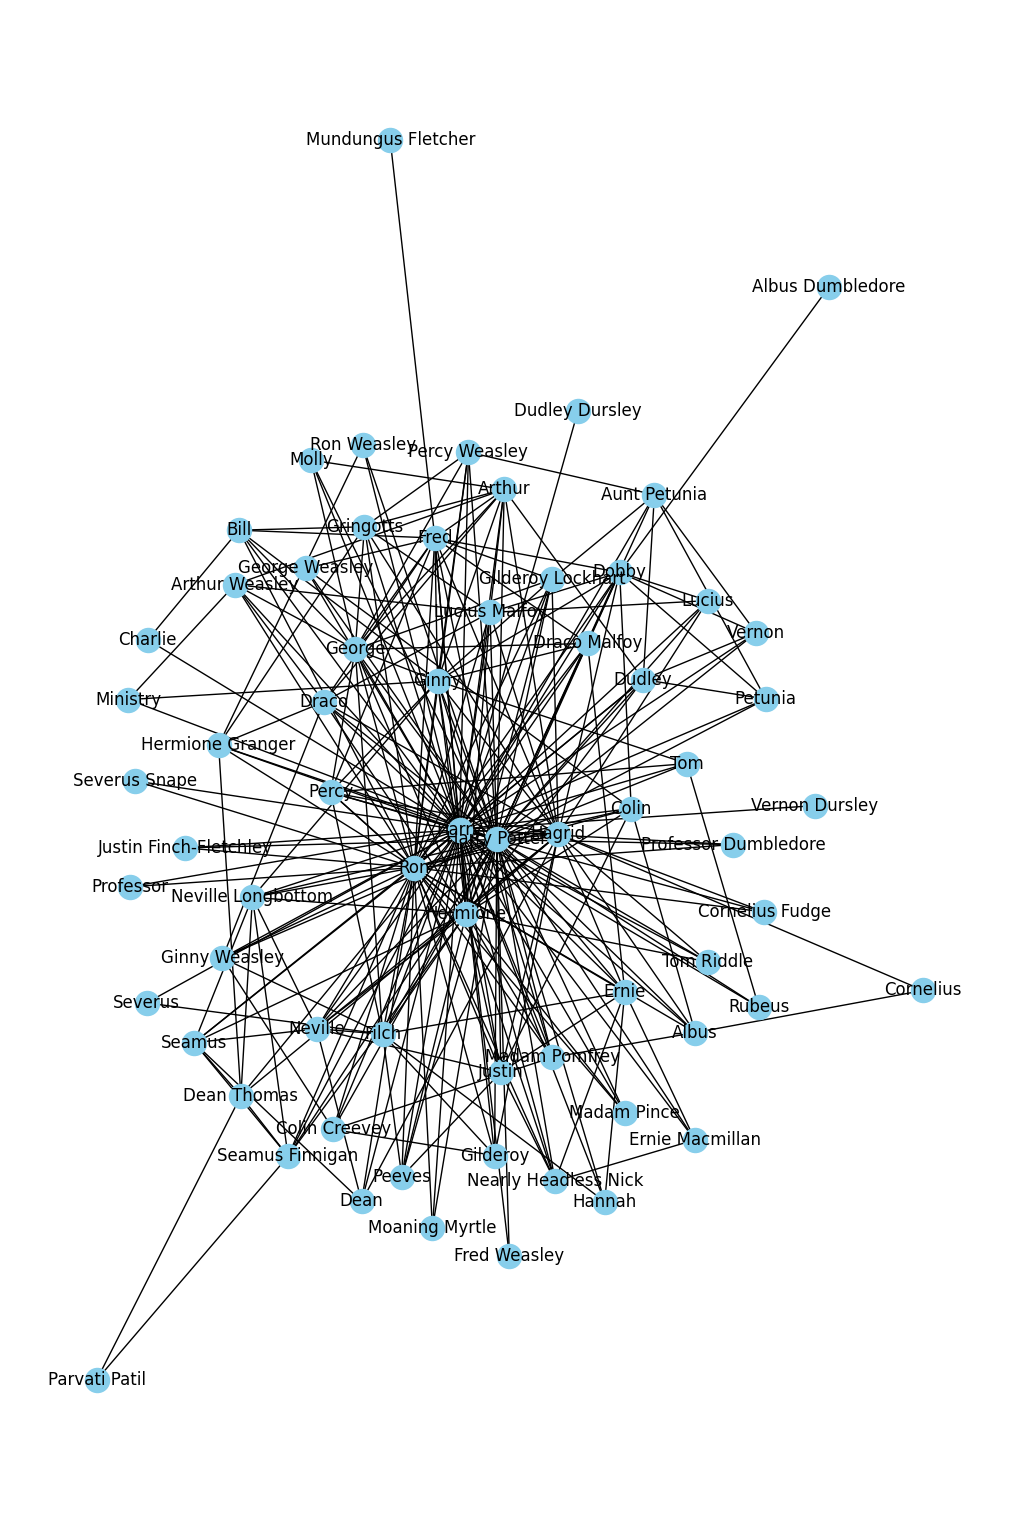

In [67]:
plt.figure(figsize = (10,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [77]:
!pip install pyvis --upgrade

In [93]:
#TODO skontati kako uraditi da pokrene ovaj netwrok lokalno
from pyvis.network import Network
net = Network(notebook= True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("harry.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [33]:
dict(G.degree)

{'Harry': 61,
 'Vernon Dursley': 1,
 'Petunia': 5,
 'Dudley': 8,
 'Harry Potter': 49,
 'Hagrid': 24,
 'Vernon': 5,
 'Aunt Petunia': 7,
 'Hermione Granger': 7,
 'Ron': 41,
 'Hermione': 25,
 'Draco Malfoy': 7,
 'Dobby': 13,
 'Albus Dumbledore': 1,
 'Ron Weasley': 3,
 'Fred': 16,
 'George': 16,
 'Lucius Malfoy': 11,
 'Dudley Dursley': 1,
 'Draco': 10,
 'Percy': 10,
 'Bill': 7,
 'Arthur': 12,
 'Ginny': 18,
 'Gilderoy Lockhart': 9,
 'Mundungus Fletcher': 1,
 'Molly': 4,
 'Arthur Weasley': 7,
 'Charlie': 2,
 'Gringotts': 9,
 'Ministry': 3,
 'Severus Snape': 2,
 'Professor': 2,
 'Severus': 2,
 'Seamus Finnigan': 8,
 'Neville Longbottom': 9,
 'Seamus': 8,
 'Dean': 5,
 'Neville': 10,
 'Justin Finch-Fletchley': 3,
 'Justin': 10,
 'Colin Creevey': 6,
 'Colin': 8,
 'Dean Thomas': 7,
 'Gilderoy': 6,
 'George Weasley': 4,
 'Filch': 13,
 'Madam Pomfrey': 7,
 'Nearly Headless Nick': 7,
 'Peeves': 6,
 'Ginny Weasley': 6,
 'Parvati Patil': 2,
 'Percy Weasley': 7,
 'Madam Pince': 4,
 'Moaning Myrtle': 3,

In [94]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Harry': 0.9242424242424243,
 'Vernon Dursley': 0.015151515151515152,
 'Petunia': 0.07575757575757576,
 'Dudley': 0.12121212121212122,
 'Harry Potter': 0.7424242424242424,
 'Hagrid': 0.36363636363636365,
 'Vernon': 0.07575757575757576,
 'Aunt Petunia': 0.10606060606060606,
 'Hermione Granger': 0.10606060606060606,
 'Ron': 0.6212121212121212,
 'Hermione': 0.3787878787878788,
 'Draco Malfoy': 0.10606060606060606,
 'Dobby': 0.19696969696969696,
 'Albus Dumbledore': 0.015151515151515152,
 'Ron Weasley': 0.045454545454545456,
 'Fred': 0.24242424242424243,
 'George': 0.24242424242424243,
 'Lucius Malfoy': 0.16666666666666669,
 'Dudley Dursley': 0.015151515151515152,
 'Draco': 0.15151515151515152,
 'Percy': 0.15151515151515152,
 'Bill': 0.10606060606060606,
 'Arthur': 0.18181818181818182,
 'Ginny': 0.2727272727272727,
 'Gilderoy Lockhart': 0.13636363636363635,
 'Mundungus Fletcher': 0.015151515151515152,
 'Molly': 0.06060606060606061,
 'Arthur Weasley': 0.10606060606060606,
 'Charlie': 0.030

<AxesSubplot: >

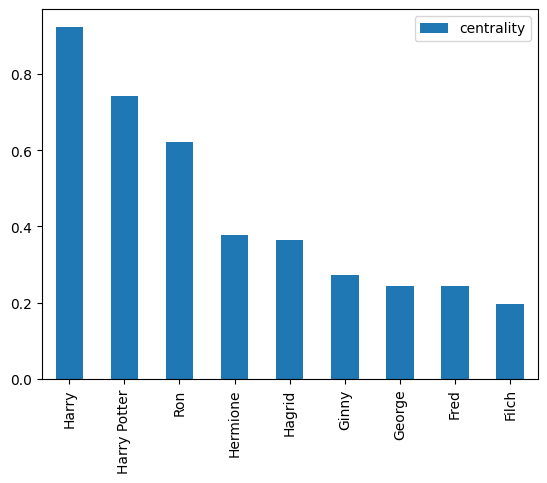

In [103]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False) [0:9].plot(kind="bar")

<AxesSubplot: >

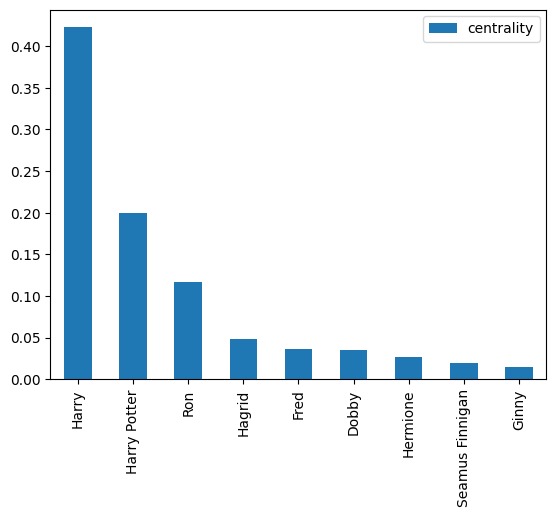

In [36]:
betweenness_dict =nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
betweenness_df.sort_values('centrality', ascending=False) [0:9].plot(kind="bar")

<AxesSubplot: >

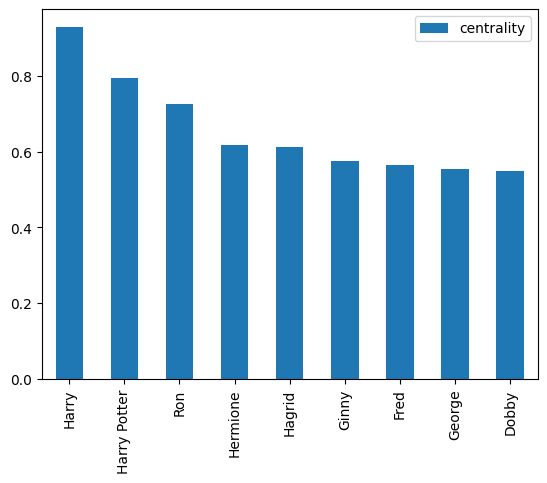

In [48]:
closeness_dict =nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False) [0:9].plot(kind="bar")

In [38]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [41]:
!pip install python-louvain

  Using cached python-louvain-0.16.tar.gz (204 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=3be2e0f8a8aa3c6998860989993f3c31dd779021e8ea268e17a1f13799b5c6f0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e0\2c\33\8b5604f69c4a6ed10fb867d51173c03f666920c7c8bbcedbaa
Successfully built python-louvain


In [42]:
#TODO skontati kako importovati community da radi i sve ispod ovoga opet pokrenuti
import community as community_louvain

In [43]:
communities = community_louvain.best_partition(G)

In [44]:
communities

{'Harry': 4,
 'Vernon Dursley': 4,
 'Petunia': 1,
 'Dudley': 1,
 'Harry Potter': 1,
 'Hagrid': 3,
 'Vernon': 1,
 'Aunt Petunia': 1,
 'Hermione Granger': 1,
 'Ron': 4,
 'Hermione': 2,
 'Draco Malfoy': 3,
 'Dobby': 3,
 'Albus Dumbledore': 3,
 'Ron Weasley': 1,
 'Fred': 3,
 'George': 3,
 'Lucius Malfoy': 3,
 'Dudley Dursley': 4,
 'Draco': 3,
 'Percy': 3,
 'Bill': 3,
 'Arthur': 3,
 'Ginny': 3,
 'Gilderoy Lockhart': 3,
 'Mundungus Fletcher': 3,
 'Molly': 3,
 'Arthur Weasley': 3,
 'Charlie': 4,
 'Gringotts': 3,
 'Ministry': 3,
 'Severus Snape': 4,
 'Professor': 4,
 'Severus': 2,
 'Seamus Finnigan': 0,
 'Neville Longbottom': 0,
 'Seamus': 0,
 'Dean': 0,
 'Neville': 0,
 'Justin Finch-Fletchley': 4,
 'Justin': 2,
 'Colin Creevey': 4,
 'Colin': 2,
 'Dean Thomas': 0,
 'Gilderoy': 4,
 'George Weasley': 2,
 'Filch': 2,
 'Madam Pomfrey': 4,
 'Nearly Headless Nick': 2,
 'Peeves': 2,
 'Ginny Weasley': 4,
 'Parvati Patil': 0,
 'Percy Weasley': 3,
 'Madam Pince': 4,
 'Moaning Myrtle': 4,
 'Fred Weasley'

In [45]:
nx.set_node_attributes(G, communities, 'group')

In [88]:
com_net = Network(notebook= True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("harry_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
